# Performing Number of Classification problem is one go!


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data= pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
from pycaret.classification import *

In [6]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [7]:
data['TotalCharges']=data["TotalCharges"].replace(r'\s+',np.nan,regex=True)
data['TotalCharges']=pd.to_numeric(data['TotalCharges'])

In [33]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


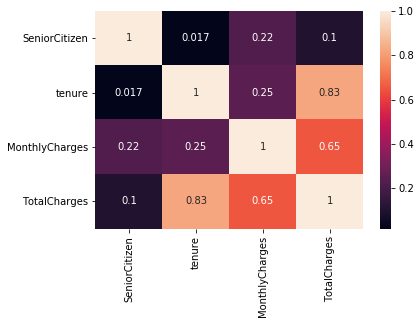

In [36]:
sns.heatmap(data.corr(),xticklabels=data.corr().columns.values,yticklabels=data.corr().columns.values,annot=True)

In [37]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [38]:
fill=data.MonthlyCharges*data.tenure

In [39]:
data.TotalCharges.fillna(fill,inplace=True)

In [40]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [41]:
data.loc[(data.Churn=='Yes'),'MonthlyCharges'].median()

79.65

In [42]:
data.loc[(data.Churn=='Yes'),'TotalCharges'].median()

703.55

In [43]:
data.loc[(data.Churn=='Yes'),'tenure'].median()

10.0

In [44]:
data.loc[(data.Churn=='Yes'),'PaymentMethod'].value_counts(normalize=True)

Electronic check             0.573034
Mailed check                 0.164794
Bank transfer (automatic)    0.138042
Credit card (automatic)      0.124131
Name: PaymentMethod, dtype: float64

In [45]:
df=data

In [46]:
def changeColumnsToString(df):
    columnsNames=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
    for col in columnsNames:
        df[col]=df[col].astype('str').str.replace('Yes','1').replace('No','0').replace('No internet service','0').replace('No phone service',0)

changeColumnsToString(df)

df['SeniorCitizen']=df['SeniorCitizen'].astype(bool)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [47]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,False,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0


In [48]:

print("Payment methods: ",df.PaymentMethod.unique())
print("Contract types: ",df.Contract.unique())
print("Gender: ",df.gender.unique())
print("Senior Citizen: ",df.SeniorCitizen.unique())
print("Internet Service Types: ",df.InternetService.unique())

Payment methods:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Contract types:  ['Month-to-month' 'One year' 'Two year']
Gender:  ['Female' 'Male']
Senior Citizen:  [False  True]
Internet Service Types:  ['DSL' 'Fiber optic' 'No']


In [49]:

df['gender']=df['gender'].astype('category')
df['PaymentMethod']=df['PaymentMethod'].astype('category')
df['Contract']=df['Contract'].astype('category')
df['SeniorCitizen']=df['SeniorCitizen'].astype('category')
df['InternetService']=df['InternetService'].astype('category')
df.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService     category
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract            category
PaperlessBilling      object
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [50]:
dfPaymentDummies = pd.get_dummies(df['PaymentMethod'], prefix = 'payment')
dfContractDummies = pd.get_dummies(df['Contract'], prefix = 'contract')
dfGenderDummies = pd.get_dummies(df['gender'], prefix = 'gender')
dfSeniorCitizenDummies = pd.get_dummies(df['SeniorCitizen'], prefix = 'SC')
dfInternetServiceDummies = pd.get_dummies(df['InternetService'], prefix = 'IS')

print(dfPaymentDummies.head(3))
print(dfContractDummies.head(3))
print(dfGenderDummies.head(3))
print(dfSeniorCitizenDummies.head(3))
print(dfInternetServiceDummies.head(3))

   payment_Bank transfer (automatic)  payment_Credit card (automatic)  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   

   payment_Electronic check  payment_Mailed check  
0                         1                     0  
1                         0                     1  
2                         0                     1  
   contract_Month-to-month  contract_One year  contract_Two year
0                        1                  0                  0
1                        0                  1                  0
2                        1                  0                  0
   gender_Female  gender_Male
0              1            0
1              0            1
2              0            1
   SC_False  SC_True
0         1        0
1         1        0
2         1        0
   IS_DSL  IS_Fiber optic  IS_No
0 

In [51]:

df.drop(['gender','PaymentMethod','Contract','SeniorCitizen','InternetService'], axis=1, inplace=True)

df = pd.concat([df, dfPaymentDummies], axis=1)
df = pd.concat([df, dfContractDummies], axis=1)
df = pd.concat([df, dfGenderDummies], axis=1)
df = pd.concat([df, dfSeniorCitizenDummies], axis=1)
df = pd.concat([df, dfInternetServiceDummies], axis=1)
df.head(2)

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Month-to-month,contract_One year,contract_Two year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber optic,IS_No
0,7590-VHVEG,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
1,5575-GNVDE,0,0,34,1,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,0


In [52]:

df.columns = ['customerID', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No']

In [53]:

numericColumns=np.array(['Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No'])

for columnName in numericColumns:
    df[columnName]=pd.to_numeric(df[columnName],errors='coerce')
df.dtypes

customerID                     object
Partner                         int64
Dependents                      int64
tenure                          int64
PhoneService                    int64
MultipleLines                   int64
OnlineSecurity                  int64
OnlineBackup                    int64
DeviceProtection                int64
TechSupport                     int64
StreamingTV                     int64
StreamingMovies                 int64
PaperlessBilling                int64
MonthlyCharges                float64
TotalCharges                  float64
Churn                           int64
payment_Bank_transfer_auto      uint8
payment_Credit_card_auto        uint8
payment_Electronic_check        uint8
payment_Mailed_check            uint8
contract_Month_to_month         uint8
contract_One_year               uint8
contract_Two_year               uint8
gender_Female                   uint8
gender_Male                     uint8
SC_False                        uint8
SC_True     

In [54]:
df

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
0,7590-VHVEG,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
1,5575-GNVDE,0,0,34,1,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,0
2,3668-QPYBK,0,0,2,1,0,1,1,0,0,...,1,0,0,0,1,1,0,1,0,0
3,7795-CFOCW,0,0,45,0,0,1,0,1,1,...,0,1,0,0,1,1,0,1,0,0
4,9237-HQITU,0,0,2,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,1,24,1,1,1,0,1,1,...,0,1,0,0,1,1,0,1,0,0
7039,2234-XADUH,1,1,72,1,1,0,1,1,0,...,0,1,0,1,0,1,0,0,1,0
7040,4801-JZAZL,1,1,11,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
7041,8361-LTMKD,1,0,4,1,1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


In [55]:
train=df[:6000]
train

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
0,7590-VHVEG,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
1,5575-GNVDE,0,0,34,1,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,0
2,3668-QPYBK,0,0,2,1,0,1,1,0,0,...,1,0,0,0,1,1,0,1,0,0
3,7795-CFOCW,0,0,45,0,0,1,0,1,1,...,0,1,0,0,1,1,0,1,0,0
4,9237-HQITU,0,0,2,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2193-SFWQW,1,1,72,1,0,1,1,1,1,...,0,0,1,0,1,1,0,0,1,0
5996,5656-JAMLX,0,0,62,1,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,1
5997,3462-BJQQA,0,0,6,1,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
5998,0442-TDYUO,1,0,48,1,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,1


In [56]:
test=df[6000:]
test

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
6000,9503-XJUME,0,1,52,1,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
6001,4367-NHWMM,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
6002,3727-RJMEO,1,0,6,1,1,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
6003,3779-OSWCF,1,0,71,1,1,1,1,1,1,...,0,0,1,1,0,1,0,1,0,0
6004,6736-DHUQI,1,1,67,1,0,1,1,1,0,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,1,24,1,1,1,0,1,1,...,0,1,0,0,1,1,0,1,0,0
7039,2234-XADUH,1,1,72,1,1,0,1,1,0,...,0,1,0,1,0,1,0,0,1,0
7040,4801-JZAZL,1,1,11,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
7041,8361-LTMKD,1,0,4,1,1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


In [57]:
new_test=test['Churn']

In [58]:
test.drop(['Churn'],axis=1,inplace=True)

K:\Anaconda3\envs\py\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
test

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
6000,9503-XJUME,0,1,52,1,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
6001,4367-NHWMM,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
6002,3727-RJMEO,1,0,6,1,1,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
6003,3779-OSWCF,1,0,71,1,1,1,1,1,1,...,0,0,1,1,0,1,0,1,0,0
6004,6736-DHUQI,1,1,67,1,0,1,1,1,0,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,1,24,1,1,1,0,1,1,...,0,1,0,0,1,1,0,1,0,0
7039,2234-XADUH,1,1,72,1,1,0,1,1,0,...,0,1,0,1,0,1,0,0,1,0
7040,4801-JZAZL,1,1,11,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
7041,8361-LTMKD,1,0,4,1,1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


In [60]:
from pycaret.classification import *

In [61]:
clf = setup(data = train, 
             target = 'Churn'
           )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5467
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(6000, 30)"
4,Missing Values,False
5,Numeric Features,17
6,Categorical Features,12
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [90]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.805100,0.849100,0.490100,0.686900,0.571100,0.449700
1,Gradient Boosting Classifier,0.803700,0.847100,0.496200,0.678100,0.572200,0.448900
2,Extreme Gradient Boosting,0.800800,0.846800,0.525300,0.657200,0.582500,0.454100
3,Logistic Regression,0.799000,0.843600,0.544400,0.643700,0.588200,0.456900
4,Ridge Classifier,0.799000,0.000000,0.509200,0.656100,0.571900,0.443700
5,Ada Boost Classifier,0.797000,0.844600,0.518400,0.646400,0.574600,0.443600
6,Light Gradient Boosting Machine,0.792900,0.831700,0.527500,0.632200,0.574400,0.439200
7,Extra Trees Classifier,0.787200,0.827500,0.463300,0.635900,0.535200,0.401900
8,Random Forest Classifier,0.777700,0.802300,0.418200,0.622400,0.498900,0.363300
9,Decision Tree Classifier,0.774800,0.688800,0.505400,0.589700,0.543600,0.395500


In [62]:
lgbm  = create_model('lightgbm')    

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8119,0.8396,0.5586,0.6739,0.6108,0.4882
1,0.8143,0.8417,0.5405,0.6897,0.6061,0.4869
2,0.7738,0.8008,0.4775,0.5889,0.5274,0.3808
3,0.8262,0.8545,0.6036,0.6979,0.6473,0.5328
4,0.8143,0.8570,0.5045,0.7089,0.5895,0.4738
5,0.8048,0.8284,0.5315,0.6629,0.5900,0.4639
6,0.8095,0.8445,0.6126,0.6476,0.6296,0.5016
7,0.8000,0.8286,0.6306,0.6195,0.6250,0.4887
8,0.7833,0.8164,0.4595,0.6220,0.5285,0.3919
9,0.7804,0.8476,0.5676,0.5888,0.5780,0.4297


In [63]:
tuned_model = tune_model('lightgbm')


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8214,0.8454,0.5586,0.7045,0.6231,0.5082
1,0.8143,0.8414,0.5315,0.6941,0.6020,0.4837
2,0.7929,0.8247,0.4865,0.6429,0.5538,0.4223
3,0.8214,0.8746,0.5946,0.6875,0.6377,0.5200
4,0.8000,0.8537,0.4685,0.6753,0.5532,0.4297
5,0.8190,0.8428,0.5766,0.6882,0.6275,0.5092
6,0.7881,0.8411,0.6126,0.5965,0.6044,0.4598
7,0.8000,0.8287,0.5946,0.6286,0.6111,0.4766
8,0.8024,0.8292,0.4414,0.7000,0.5414,0.4236
9,0.7828,0.8461,0.5315,0.6020,0.5646,0.4207


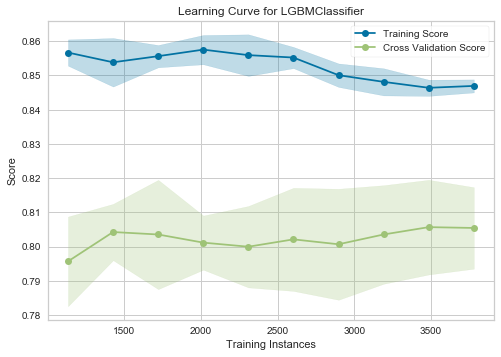

In [64]:
plot_model(estimator = tuned_model, plot = 'learning')

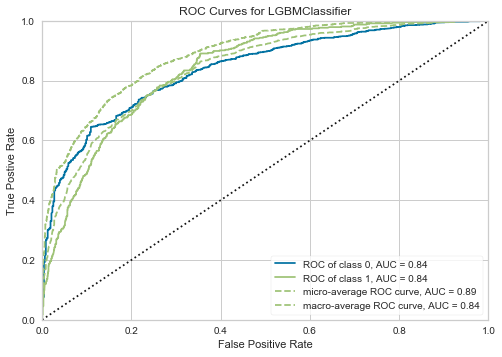

In [65]:
plot_model(estimator = tuned_model, plot = 'auc')

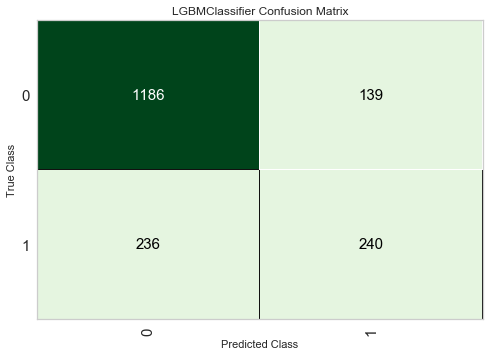

In [66]:
plot_model(estimator = tuned_model, plot = 'confusion_matrix')

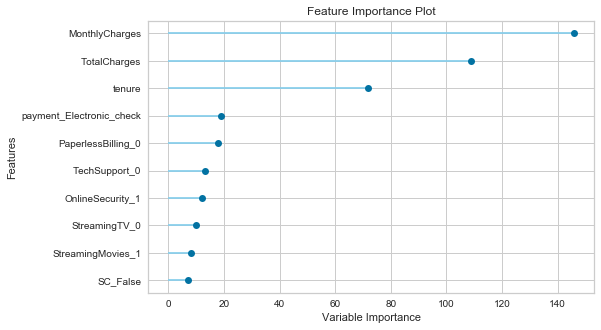

In [67]:
plot_model(estimator = tuned_model, plot = 'feature')

In [68]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

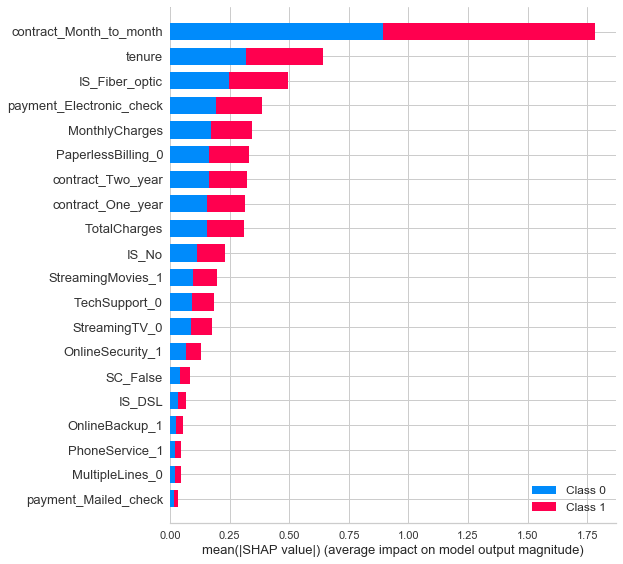

In [69]:
interpret_model(tuned_model)

In [70]:
predict_model(tuned_model, data=test)

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No,Label,Score
0,9503-XJUME,0,1,52,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0.0312
1,4367-NHWMM,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0.6843
2,3727-RJMEO,1,0,6,1,1,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0.6680
3,3779-OSWCF,1,0,71,1,1,1,1,1,1,...,1,1,0,1,0,1,0,0,0,0.0317
4,6736-DHUQI,1,1,67,1,0,1,1,1,0,...,0,1,0,1,0,0,1,0,0,0.0437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,6840-RESVB,1,1,24,1,1,1,0,1,1,...,0,0,1,1,0,1,0,0,0,0.1758
1039,2234-XADUH,1,1,72,1,1,0,1,1,0,...,0,1,0,1,0,0,1,0,0,0.0923
1040,4801-JZAZL,1,1,11,0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,0.2591
1041,8361-LTMKD,1,0,4,1,1,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0.7032


In [71]:
predictions_made = predict_model(tuned_model, data=test)
predictions_made.head(20)

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No,Label,Score
0,9503-XJUME,0,1,52,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0.0312
1,4367-NHWMM,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0.6843
2,3727-RJMEO,1,0,6,1,1,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0.6680
3,3779-OSWCF,1,0,71,1,1,1,1,1,1,...,1,1,0,1,0,1,0,0,0,0.0317
4,6736-DHUQI,1,1,67,1,0,1,1,1,0,...,0,1,0,1,0,0,1,0,0,0.0437
5,3915-ODIYG,0,0,60,1,1,1,1,0,0,...,0,0,1,0,1,1,0,0,0,0.1118
6,1360-RCYRT,1,1,23,0,0,0,0,0,1,...,0,0,1,1,0,1,0,0,0,0.2014
7,2724-FJDYW,0,1,39,0,0,0,0,1,1,...,0,0,1,1,0,1,0,0,0,0.1501
8,4451-RWASJ,1,1,15,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0.0403
9,6646-VRFOL,1,0,53,1,1,0,1,1,0,...,0,0,1,0,1,0,1,0,1,0.5140
